<a href="https://colab.research.google.com/github/PriyankaRaii/Python_Projects/blob/main/Titanic_Survival.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**## Data description**
The business meaning of each column in the data is as below

* <b>PassengerId</b>: The id for each passenger
* <b>Survived</b>: Whether the passenger survived or not? 1=Survived, 0=Died
* <b>Pclass</b>: The travel class of the passenger
* <b>Name</b>: Name of the passenger
* <b>Sex</b>: The genger of the passenger
* <b>Age</b>: The Age of the passenger
* <b>SibSp</b>: Number of Siblings/Spouses Aboard
* <b>Parch</b>: Number of Parents/Children Aboard
* <b>Ticket</b>: The ticket number of the passenger
* <b>Fare</b>: The amount of fare paid by the passenger
* <b>Cabin</b>: The cabin number allotted
* <b>Embarked</b>: Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path='/content/drive/MyDrive/Colab Notebooks/python Datasets /TitanicSurvivalData.csv'

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
import pandas as pd
import numpy as np

TitanicSurvivalData=pd.read_csv(path)

print('Shape before deleting duplicate values:', TitanicSurvivalData.shape)

TitanicSurvivalData=TitanicSurvivalData.drop_duplicates()
print('Shape After deleting duplicate values:', TitanicSurvivalData.shape)

TitanicSurvivalData.head(10)

Shape before deleting duplicate values: (891, 12)
Shape After deleting duplicate values: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## **# Defining the problem statement:**
#### Create a Predictive model which can tell if a person will survive the titanic crash or not?
* Target Variable: Survived
* Predictors: age, sex, passenger class etc.


* Survived=0 The passenger died
* Survived=1 The passenger survived

## **Determining the type of Machine Learning:**

Based on the problem statement you can understand that we need to create a supervised ML classification model, as the target variable is categorical.

<Axes: xlabel='Survived'>

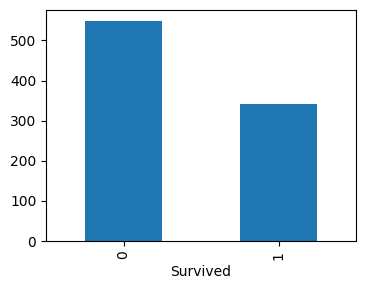

In [6]:
%matplotlib inline
GroupedData=TitanicSurvivalData.groupby('Survived').size()
GroupedData.plot(kind='bar',figsize=(4,3))


In [7]:
TitanicSurvivalData.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


In [8]:
TitanicSurvivalData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


In [9]:
TitanicSurvivalData.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
TitanicSurvivalData.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [11]:
TitanicSurvivalData.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

## **Basic Data Exploration Results**

The selected columns in this step are not final, further study will be done and then a final list will be created

* <b>PassengerId</b>: Qualitative. Rejected. We can't do any calculation on this column,its not useful.
* <b>Survived</b>: Categorical. Selected. This is the <b>Target Variable!</b>
* <b>Pclass</b>: Categorical. Selected.
* <b>Name</b>: Qualitative. Rejected.  We can't do any calculation on this column,its not useful.
* <b>Sex</b>: Categorical. Selected.
* <b>Age</b>: Continuous. Selected.
* <b>SibSp</b>: Categorical. Selected.
* <b>Parch</b>: Categorical. Selected.
* <b>Ticket</b>: Qualitative. Rejected.Its ticket number of the passenger We can't do any calculation on this column, its not useful.
* <b>Fare</b>: Continuous. Selected.
* <b>Cabin</b>: Qualitative. Rejected. Too many missing values!
* <b>Embarked</b>: Categorical. Selected.

## **Removing useless columns from the data**

In [12]:
QualitativeCol=['PassengerId','Name', 'Ticket', 'Cabin']
TitanicSurvivalData=TitanicSurvivalData.drop(QualitativeCol,axis=1)
TitanicSurvivalData.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


## **Visual Exploratory Data Analysis**
* Categorical variables: Bar plot
* Continuous variables: Histogram

In [13]:
def PlotBarCharts(inpData,ColToPlot):
  %matplotlib inline
  import matplotlib.pyplot as plt
  fig, subPlot = plt.subplots(nrows=1, ncols=len(ColToPlot),figsize=(20,8))
  fig. suptitle('Bar charts of:'+ str(ColToPlot))

  for ColName, PlotNumber in zip(ColToPlot, range(len(ColToPlot))):
    inpData.groupby(ColName).size().plot(kind='bar',ax=subPlot[PlotNumber])

In [14]:
TitanicSurvivalData.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

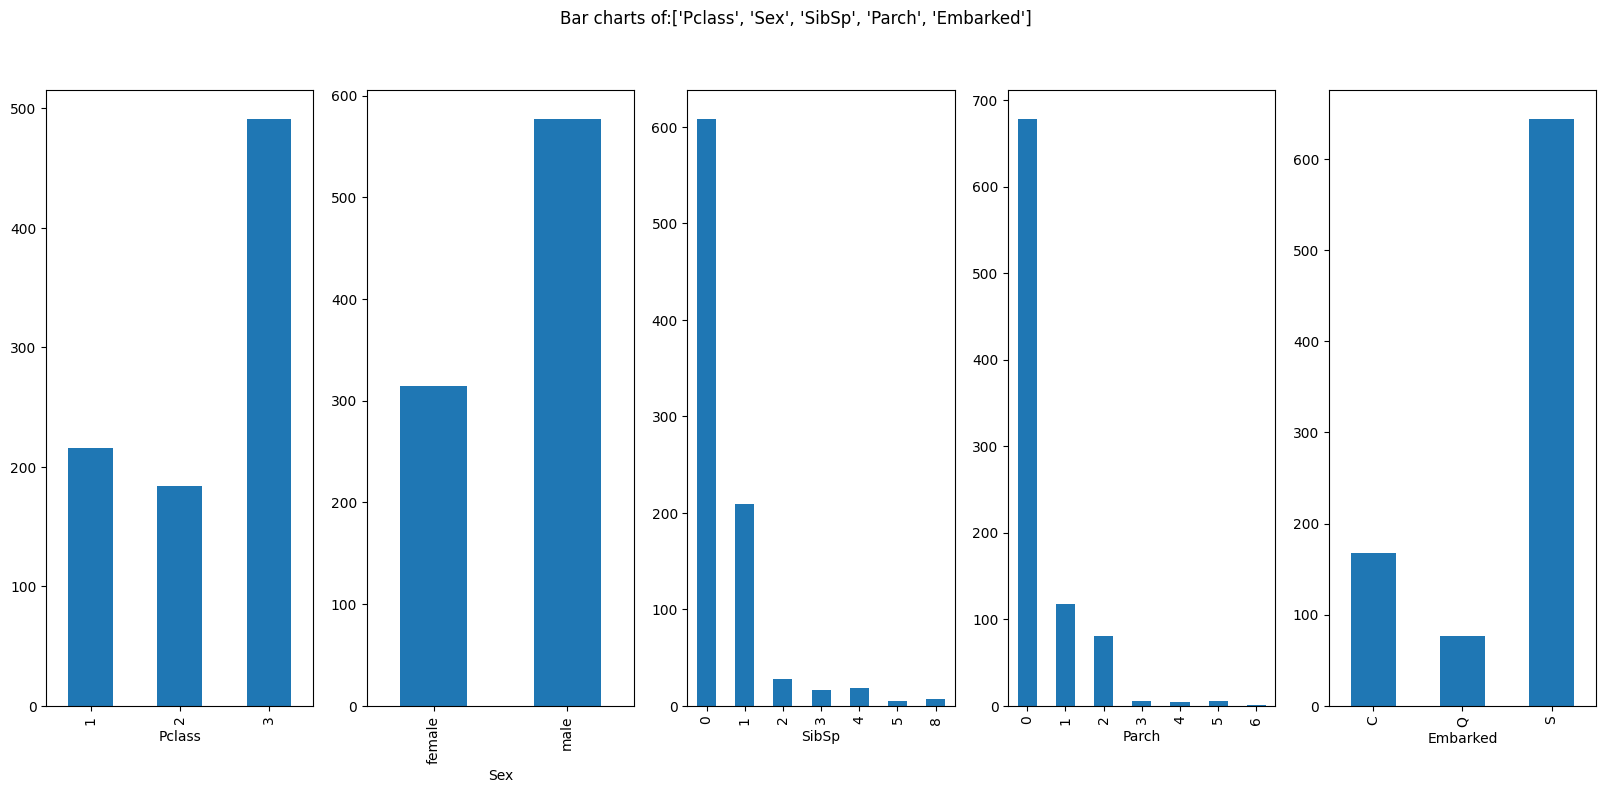

In [15]:
PlotBarCharts(inpData=TitanicSurvivalData,ColToPlot=['Pclass','Sex','SibSp',
       'Parch','Embarked'])

Outlier Treatment

In [16]:
TitanicSurvivalData['SibSp'][TitanicSurvivalData['SibSp']>=2]=2

In [17]:
TitanicSurvivalData['Parch'][TitanicSurvivalData['Parch']>=3]=3

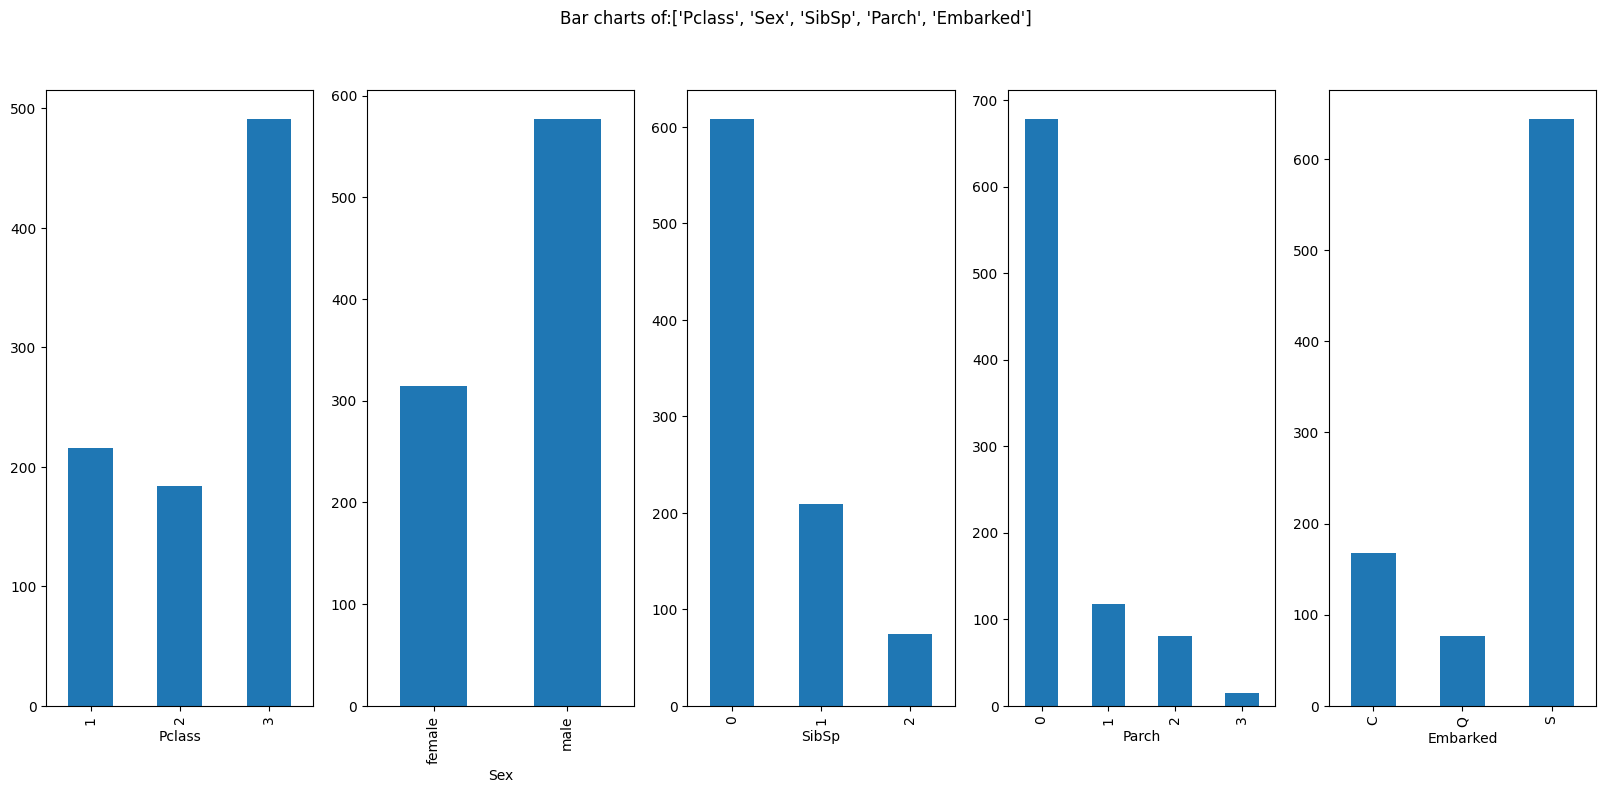

In [18]:
PlotBarCharts(inpData=TitanicSurvivalData,ColToPlot=['Pclass','Sex','SibSp', 'Parch','Embarked'])

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Fare'}>]], dtype=object)

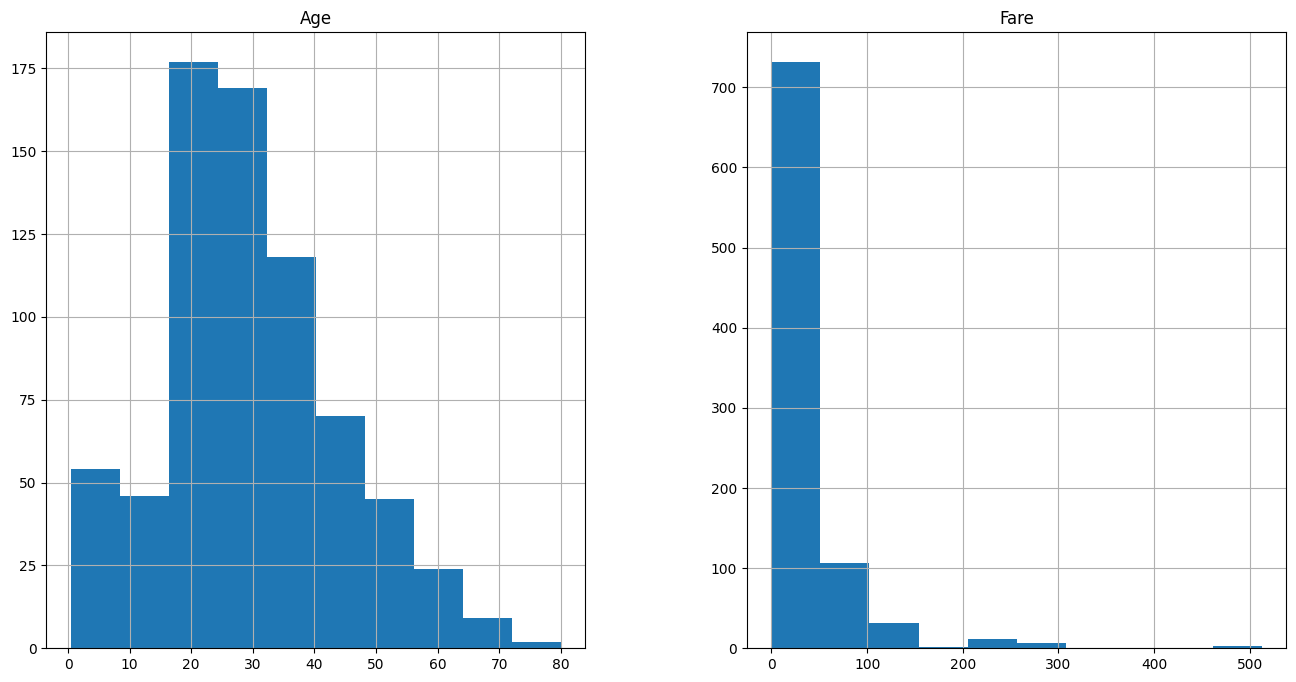

In [19]:
TitanicSurvivalData.hist(['Age', 'Fare'],figsize=(16,8))

In [20]:
TitanicSurvivalData['Fare'][TitanicSurvivalData['Fare']<300].sort_values(ascending=False)

27     263.000
341    263.000
438    263.000
88     263.000
742    262.375
        ...   
633      0.000
413      0.000
822      0.000
732      0.000
674      0.000
Name: Fare, Length: 888, dtype: float64

In [21]:
# 263 is the nearest value to 300 replacing any value above 300 in it
TitanicSurvivalData['Fare'][TitanicSurvivalData['Fare']>300]=263.0

array([[<Axes: title={'center': 'Fare'}>,
        <Axes: title={'center': 'Age'}>]], dtype=object)

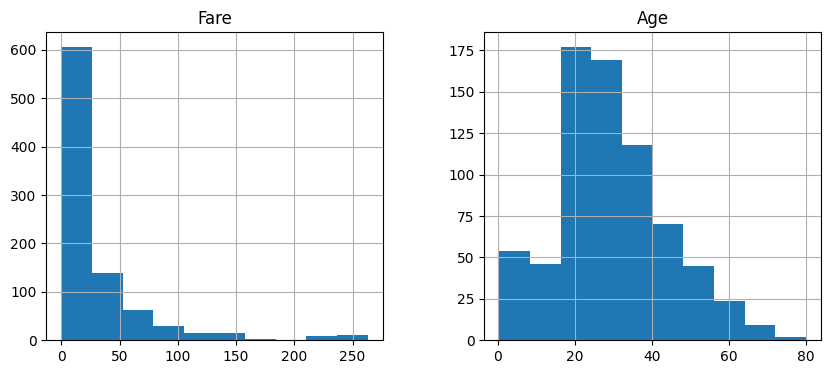

In [22]:
TitanicSurvivalData.hist(['Fare','Age'],figsize=(10,4))

**Missing values treatment**

In [23]:
TitanicSurvivalData.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

Here, I am using Median and Mode value for the missing value replacement

Impute the missing values with MEDIAN value for continuous variables

Impute the missing values with MODE value for categorical variables


In [24]:
TitanicSurvivalData['Age'].fillna(TitanicSurvivalData['Age'].median(),inplace=True)

TitanicSurvivalData['Embarked'].fillna(TitanicSurvivalData['Embarked'].mode()[0],inplace=True)

In [25]:
TitanicSurvivalData.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

# Relationship exploration: Categorical Vs Continuous -- Box Plots
When the target variable is Categorical and the predictor variable is Continuous we analyze the relation using bar plots/Boxplots and measure the strength of relation using Anova test

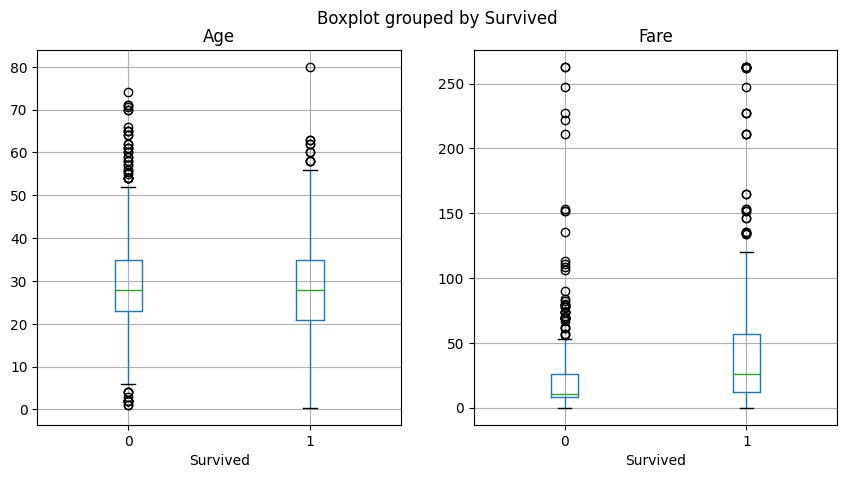

In [26]:
ContinuousColsList=['Age','Fare']

import matplotlib.pyplot as plt
fig, PlotCanvas = plt.subplots(nrows=1, ncols=len(ContinuousColsList),figsize=(10,5))

for predictorCol , ColNumber in zip(ContinuousColsList,range(len(ContinuousColsList))):
  TitanicSurvivalData.boxplot(column=predictorCol,by='Survived', figsize=(5,5), vert=True, ax=PlotCanvas[ColNumber])


## **Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test**

In [27]:
def FunctionAnova(inpData, TargetVariable, ContinuousPredictorList):
    from scipy.stats import f_oneway

    SelectedPredictors=[]

    print('##### ANOVA Results ##### \n')
    for predictor in ContinuousPredictorList:

        CategoryGroupLists  =       inpData.groupby(TargetVariable)[predictor].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)

        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])

    return(SelectedPredictors)

In [28]:
from ast import ListComp
def FunctionAnova(inpData, TargetVariable, ContinuousPredictorsList):
  from scipy.stats import f_oneway

  SelectedPredictors=[]

  print('#### Anova Results #### \n')

  for predictor in ContinuousPredictorsList:
    categoryGroupLists=inpData.groupby(TargetVariable)[predictor].apply(list)
    AnovaResult = f_oneway(*categoryGroupLists)

    if (AnovaResult[1] < 0.05) :
      print(predictor, 'is correlated with' , TargetVariable, '| P-Value:', AnovaResult[1])
      SelectedPredictors.append(predictor)

    else:
      print(predictor, 'is Not correlated with' , TargetVariable, '| P-Value:', AnovaResult[1])


  return(SelectedPredictors)

In [29]:
ContinuousVariables=['Age','Fare']

FunctionAnova(inpData= TitanicSurvivalData, TargetVariable='Survived', ContinuousPredictorsList=ContinuousVariables)


#### Anova Results #### 

Age is Not correlated with Survived | P-Value: 0.052760688475835
Fare is correlated with Survived | P-Value: 1.8421954983111479e-16


['Fare']

## Relationship exploration: Categorical Vs Categorical -- Grouped Bar Charts

In [30]:
CrossTabResult=pd.crosstab(index=TitanicSurvivalData['Sex'],columns=TitanicSurvivalData['Survived'])
CrossTabResult

Survived,0,1
Sex,,
female,81,233
male,468,109


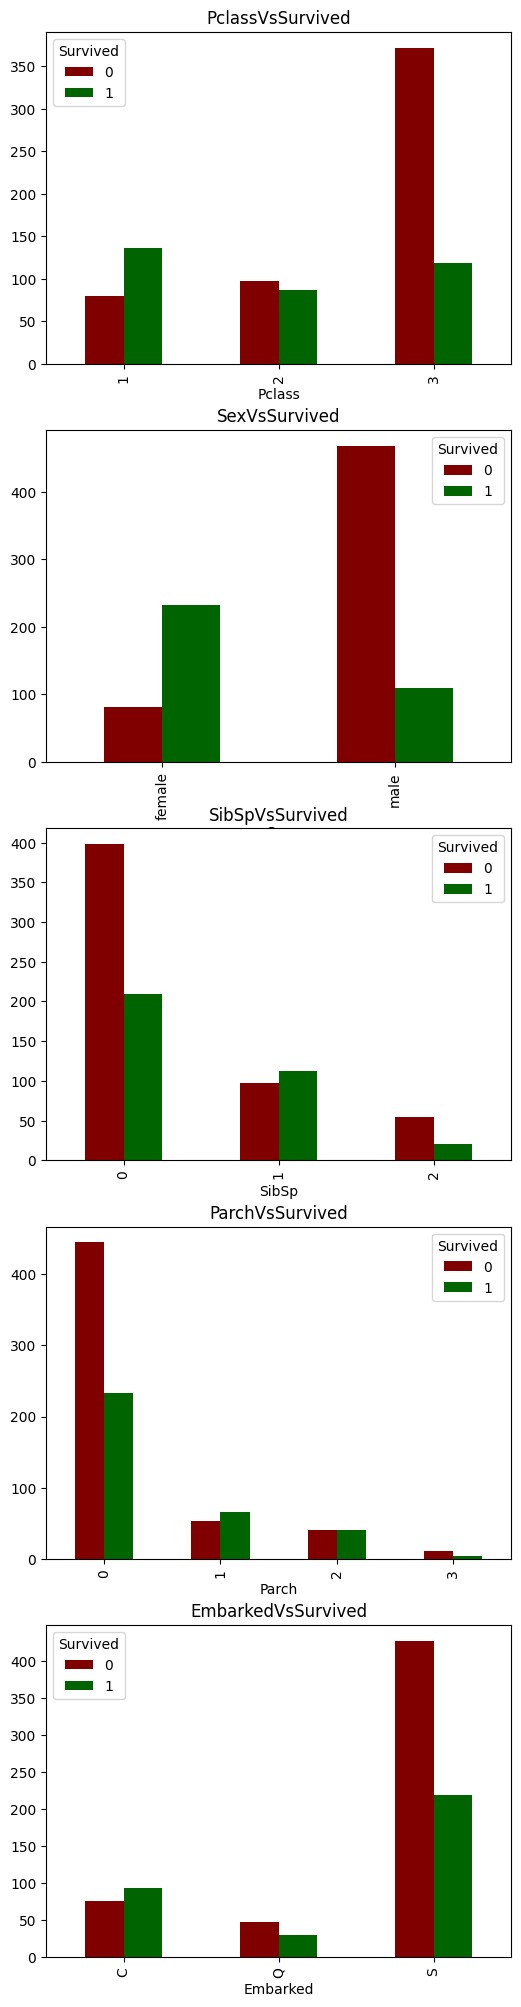

In [31]:
CategoricalList=['Pclass','Sex','SibSp', 'Parch','Embarked']

import matplotlib.pyplot as plt
fig, PlotCanvas = plt.subplots(nrows=len(CategoricalList), ncols=1, figsize=(6,25))

for CategoricalCol, ColNumber in zip(CategoricalList, range(len(CategoricalList))):
  CrossTabResult=pd.crosstab(index=TitanicSurvivalData[CategoricalCol], columns=TitanicSurvivalData['Survived'])
  CrossTabResult.plot.bar(color=['maroon', 'darkgreen'],ax=PlotCanvas[ColNumber],title=CategoricalCol+'Vs'+'Survived')


### Statistical Feature Selection (Categorical Vs Categorical) using Chi-Square Test


In [32]:
def FunctionChisq(inpData,TargetVariable,CategoricalVarCol):
  from scipy.stats import chi2_contingency

  SelectedPredictors=[]

  for Predictors in CategoricalVarCol:
    CrossTabResult=pd.crosstab(index=inpData[TargetVariable],columns=inpData[Predictors])
    ChiSqResult= chi2_contingency(CrossTabResult)

    if ChiSqResult[1]<0.05:
      print(Predictors,'is correlated with',TargetVariable, '| P-Value:',ChiSqResult[1])
      SelectedPredictors.append(Predictors)
    else:
        print(Predictors,'is Not correlated with',TargetVariable, '| P-Value:',ChiSqResult[1])

  return(SelectedPredictors)

In [33]:
CategoricalVariables=['Pclass', 'Sex', 'SibSp','Parch','Embarked']

FunctionChisq(inpData=TitanicSurvivalData,TargetVariable='Survived',CategoricalVarCol=CategoricalVariables)

Pclass is correlated with Survived | P-Value: 4.549251711298793e-23
Sex is correlated with Survived | P-Value: 1.1973570627755645e-58
SibSp is correlated with Survived | P-Value: 7.28560209980573e-07
Parch is correlated with Survived | P-Value: 2.5227955142443396e-05
Embarked is correlated with Survived | P-Value: 2.3008626481449577e-06


['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

## Selecting final predictors for Machine Learning
Based on the above tests, selecting the final columns for machine learning

In [34]:
SelectedColumns=['Pclass', 'Sex', 'SibSp','Parch','Embarked','Fare']

DataForML=TitanicSurvivalData[SelectedColumns]
DataForML.head()

,Pclass,Sex,SibSp,Parch,Embarked,Fare
0,3,male,1,0,S,7.2500
1,1,female,1,0,C,71.2833
2,3,female,0,0,S,7.9250
3,1,female,1,0,S,53.1000
4,3,male,0,0,S,8.0500


In [35]:
DataForML.to_pickle('DataForML.pkl')

**## Data Pre-processing for Machine Learning**

In [36]:
DataForML.columns

Index(['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Fare'], dtype='object')

In [37]:
DataForML['Sex'].replace({'female':0, 'male':1},inplace=True)
DataForML.head()

,Pclass,Sex,SibSp,Parch,Embarked,Fare
0,3,1,1,0,S,7.2500
1,1,0,1,0,C,71.2833
2,3,0,0,0,S,7.9250
3,1,0,1,0,S,53.1000
4,3,1,0,0,S,8.0500


In [38]:
DataForML_Numeric=pd.get_dummies(DataForML)

DataForML_Numeric['Survived']=TitanicSurvivalData['Survived']

In [39]:
DataForML_Numeric.head()

,Pclass,Sex,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Survived
0,3,1,1,0,7.2500,0,0,1,0
1,1,0,1,0,71.2833,1,0,0,1
2,3,0,0,0,7.9250,0,0,1,1
3,1,0,1,0,53.1000,0,0,1,1
4,3,1,0,0,8.0500,0,0,1,0


## **Machine Learning: Splitting the data into Training and Testing sample**

I am using 70% of data as Training data and the rest 30% for Tesing data.

In [40]:
DataForML_Numeric.columns

Index(['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Survived'],
      dtype='object')

#### **Standardization/Normalization of data**

In [41]:
TargetVariable = 'Survived'
Predictors = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S']

X = DataForML_Numeric[Predictors].values
y = DataForML_Numeric[TargetVariable].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

from sklearn.preprocessing import StandardScaler, MinMaxScaler

PredictorScaler = MinMaxScaler()

PredictorScalerFit = PredictorScaler.fit(X)

X_train_scaled = PredictorScalerFit.transform(X_train)
X_test_scaled = PredictorScalerFit.transform(X_test)


In [42]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(623, 8)
(623,)
(268, 8)
(268,)


In [43]:
X_train[0:4]

array([[ 3.    ,  1.    ,  0.    ,  0.    ,  6.4958,  0.    ,  0.    ,
         1.    ],
       [ 3.    ,  1.    ,  0.    ,  0.    ,  8.1125,  0.    ,  0.    ,
         1.    ],
       [ 3.    ,  1.    ,  0.    ,  0.    ,  8.05  ,  0.    ,  0.    ,
         1.    ],
       [ 3.    ,  0.    ,  2.    ,  2.    , 46.9   ,  0.    ,  0.    ,
         1.    ]])

## **Logistic Regression**

In [44]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(C=5,penalty = 'l2', solver='newton-cg')

LOG = clf.fit(X_train,y_train)
prediction=LOG.predict(X_test)

from sklearn import metrics

print(metrics.classification_report(y_test,prediction))
print(metrics.confusion_matrix(y_test,prediction))

F1_Score=metrics.f1_score(y_test,prediction, average ='weighted')

print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))
from sklearn.model_selection import cross_val_score

Accuracy_Values=cross_val_score(LOG, X, y, cv=10, scoring='f1_weighted')

print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:',round(Accuracy_Values.mean(),2))

              precision    recall  f1-score   support

           0       0.77      0.82      0.79       149
           1       0.75      0.69      0.72       119

    accuracy                           0.76       268
   macro avg       0.76      0.75      0.76       268
weighted avg       0.76      0.76      0.76       268

[[122  27]
 [ 37  82]]
Accuracy of the model on Testing Sample Data: 0.76

Accuracy values for 10-fold Cross Validation:
 [0.76723952 0.77641044 0.75981111 0.82182649 0.76650762 0.74942095
 0.76173197 0.74942095 0.79649424 0.76195095]

Final Average Accuracy of the model: 0.77


DecisionTreeClassifier(criterion='entropy', max_depth=10)
              precision    recall  f1-score   support

           0       0.79      0.87      0.82       149
           1       0.81      0.71      0.75       119

    accuracy                           0.79       268
   macro avg       0.80      0.79      0.79       268
weighted avg       0.80      0.79      0.79       268

[[129  20]
 [ 35  84]]
Accuracy of the model on Testing Sample Data: 0.79

Accuracy values for 10-fold Cross Validation:
 [0.78696488 0.75981111 0.71138693 0.84171774 0.87519294 0.83754206
 0.77830713 0.76791722 0.82683216 0.82550973]

Final Average Accuracy of the model: 0.8


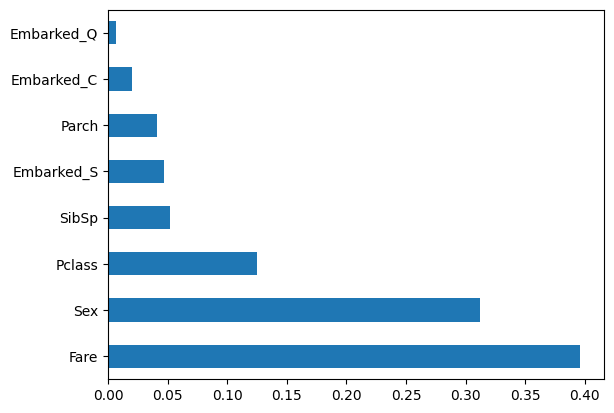

In [50]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(max_depth=10,criterion='entropy')

print(clf)

DTree=clf.fit(X_train,y_train)
prediction=DTree.predict(X_test)

from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

%matplotlib inline
feature_importances = pd.Series(DTree.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

from sklearn.model_selection import cross_val_score

Accuracy_Values=cross_val_score(DTree, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

Deployment of the Model

In [52]:
TargetVariable='Survived'

Predictors=['Fare', 'Sex', 'Parch', 'Pclass','SibSp', 'Embarked_S']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

from sklearn.preprocessing import StandardScaler, MinMaxScaler

PredictorScaler=MinMaxScaler()

PredictorScalerFit=PredictorScaler.fit(X)

X=PredictorScalerFit.transform(X)

print(X.shape)
print(y.shape)

(891, 6)
(891,)


In [54]:

from sklearn import tree

clf = tree.DecisionTreeClassifier(max_depth=10,criterion='entropy')

FinalDecisionTreeModel=clf.fit(X,y)

In [55]:
from sklearn.model_selection import cross_val_score

Accuracy_Values=cross_val_score(FinalDecisionTreeModel, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [0.78696488 0.75981111 0.71138693 0.85250075 0.87519294 0.83754206
 0.77830713 0.74470894 0.81433378 0.82550973]

Final Average Accuracy of the model: 0.8


In [56]:
import pickle
import os

with open('FinalDecisionTreeModel.pkl', 'wb') as fileWriteStream:
    pickle.dump(FinalDecisionTreeModel, fileWriteStream)

    fileWriteStream.close()

print('pickle file of Predictive Model is saved at Location:',os.getcwd())

pickle file of Predictive Model is saved at Location: /content


In [57]:
def FunctionPredictResult(InputData):
    import pandas as pd
    Num_Inputs=InputData.shape[0]

    DataForML=pd.read_pickle('DataForML.pkl')
    InputData=InputData.append(DataForML)

    InputData['Sex'].replace({'female':0, 'male':1}, inplace=True)

    InputData=pd.get_dummies(InputData)

    Predictors=['Fare', 'Sex', 'Parch', 'Pclass','SibSp', 'Embarked_S']

    X=InputData[Predictors].values[0:Num_Inputs]

    X=PredictorScalerFit.transform(X)

    import pickle
    with open('FinalDecisionTreeModel.pkl', 'rb') as fileReadStream:
        PredictionModel=pickle.load(fileReadStream)

        fileReadStream.close()

    Prediction=PredictionModel.predict(X)
    PredictionResult=pd.DataFrame(Prediction, columns=['Predicted Status'])
    return(PredictionResult)

In [70]:

NewSampleData=pd.DataFrame(
data=[[71,'female',1, 1,1,1],
     [20,'male',0, 1,0,0],[20,'female',0, 1,0,0],
     [50,'male',0, 1,0,0]],
columns=['Fare', 'Sex', 'Parch', 'Pclass','SibSp', 'Embarked'])

print(NewSampleData)

# Calling the Function for prediction
FunctionPredictResult(InputData= NewSampleData)

   Fare     Sex  Parch  Pclass  SibSp  Embarked
0    71  female      1       1      1         1
1    20    male      0       1      0         0
2    20  female      0       1      0         0
3    50    male      0       1      0         0


,Predicted Status
0,1
1,0
2,1
3,0
